In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests as req
import time
from datetime import datetime

from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

Beginning Data Retrieval     
-----------------------------


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | zyryanka
Processing Record 2 of Set 1 | sorvag
City not found. Skipping...
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | harper
Processing Record 8 of Set 1 | chicama
Processing Record 9 of Set 1 | mitsamiouli
Processing Record 10 of Set 1 | lagoa
Processing Record 11 of Set 1 | goderich
Processing Record 12 of Set 1 | viransehir
Processing Record 13 of Set 1 | bambanglipuro
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | san policarpo
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | yakima
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | angoche
Processing Record 21 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 22 of Set 1 | luderitz
Processing Record 23 of Set 1 | mataura
Process

Processing Record 39 of Set 4 | qafsah
City not found. Skipping...
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | broken hill
Processing Record 42 of Set 4 | assenede
Processing Record 43 of Set 4 | shemgang
Processing Record 44 of Set 4 | rio grande
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | senador guiomard
Processing Record 47 of Set 4 | presidencia roque saenz pena
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | camocim
Processing Record 50 of Set 4 | loyga
Processing Record 1 of Set 5 | sambava
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | saint anthony
Processing Record 5 of Set 5 | vardo
Processing Record 6 of Set 5 | te anau
Processing Record 7 of Set 5 | jasper
Processing Record 8 of Set 5 | bud
Processing Record 9 of Set 5 | qasigiannguit
Processing Record 10 of Set 5 | robertsport
Processi

Processing Record 30 of Set 8 | sijunjung
Processing Record 31 of Set 8 | esil
Processing Record 32 of Set 8 | dicamay
Processing Record 33 of Set 8 | vawkavysk
Processing Record 34 of Set 8 | gizo
Processing Record 35 of Set 8 | carnot
Processing Record 36 of Set 8 | banda aceh
Processing Record 37 of Set 8 | havoysund
Processing Record 38 of Set 8 | chitral
Processing Record 39 of Set 8 | sao jose da coroa grande
Processing Record 40 of Set 8 | bandarbeyla
Processing Record 41 of Set 8 | manavalakurichi
Processing Record 42 of Set 8 | tual
Processing Record 43 of Set 8 | honiara
Processing Record 44 of Set 8 | demak
Processing Record 45 of Set 8 | esperance
Processing Record 46 of Set 8 | beaufort
Processing Record 47 of Set 8 | saint-augustin
Processing Record 48 of Set 8 | mountain home
Processing Record 49 of Set 8 | khor
Processing Record 50 of Set 8 | nizwa
Processing Record 1 of Set 9 | lasa
Processing Record 2 of Set 9 | madaba
Processing Record 3 of Set 9 | chumayel
Processin

Processing Record 22 of Set 12 | srandakan
Processing Record 23 of Set 12 | ust-maya
Processing Record 24 of Set 12 | lolua
City not found. Skipping...
Processing Record 25 of Set 12 | winneba
Processing Record 26 of Set 12 | verkhoyansk
Processing Record 27 of Set 12 | tolaga bay
Processing Record 28 of Set 12 | casa nova
Processing Record 29 of Set 12 | waterlooville
Processing Record 30 of Set 12 | iberia
Processing Record 31 of Set 12 | syamzha
Processing Record 32 of Set 12 | kaeo
Processing Record 33 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 34 of Set 12 | preobrazheniye
Processing Record 35 of Set 12 | kohlu
Processing Record 36 of Set 12 | hoquiam
Processing Record 37 of Set 12 | gamba
Processing Record 38 of Set 12 | gueret
Processing Record 39 of Set 12 | plouzane
Processing Record 40 of Set 12 | waingapu
Processing Record 41 of Set 12 | tidore
City not found. Skipping...
Processing Record 42 of Set 12 | pontal do parana
Processing Record 43 of Set 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zyryanka,65.7500,150.8500,-37.19,100,100,4.85,RU,2022-12-31 05:58:50
1,Isangel,-19.5500,169.2667,81.45,82,24,14.25,VU,2022-12-31 05:58:51
2,Ponta Do Sol,32.6667,-17.1000,69.01,73,93,6.29,PT,2022-12-31 05:58:51
3,Busselton,-33.6500,115.3333,76.32,40,100,15.32,AU,2022-12-31 05:58:52
4,Chuy,-33.6971,-53.4616,68.61,70,4,8.63,UY,2022-12-31 05:58:52
5,Harper,4.3750,-7.7169,75.34,90,30,3.85,LR,2022-12-31 05:58:53
6,Chicama,-7.8447,-79.1469,64.94,79,99,4.38,PE,2022-12-31 05:58:53
7,Mitsamiouli,-11.3847,43.2844,86.29,62,40,5.75,KM,2022-12-31 05:58:53
8,Lagoa,39.0500,-27.9833,53.42,58,99,29.08,PT,2022-12-31 05:58:54
9,Goderich,43.7501,-81.7165,43.12,93,100,4.61,CA,2022-12-31 05:58:54


In [15]:
# Order the Data
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zyryanka,RU,2022-12-31 05:58:50,65.7500,150.8500,-37.19,100,100,4.85
1,Isangel,VU,2022-12-31 05:58:51,-19.5500,169.2667,81.45,82,24,14.25
2,Ponta Do Sol,PT,2022-12-31 05:58:51,32.6667,-17.1000,69.01,73,93,6.29
3,Busselton,AU,2022-12-31 05:58:52,-33.6500,115.3333,76.32,40,100,15.32
4,Chuy,UY,2022-12-31 05:58:52,-33.6971,-53.4616,68.61,70,4,8.63
5,Harper,LR,2022-12-31 05:58:53,4.3750,-7.7169,75.34,90,30,3.85
6,Chicama,PE,2022-12-31 05:58:53,-7.8447,-79.1469,64.94,79,99,4.38
7,Mitsamiouli,KM,2022-12-31 05:58:53,-11.3847,43.2844,86.29,62,40,5.75
8,Lagoa,PT,2022-12-31 05:58:54,39.0500,-27.9833,53.42,58,99,29.08
9,Goderich,CA,2022-12-31 05:58:54,43.7501,-81.7165,43.12,93,100,4.61


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

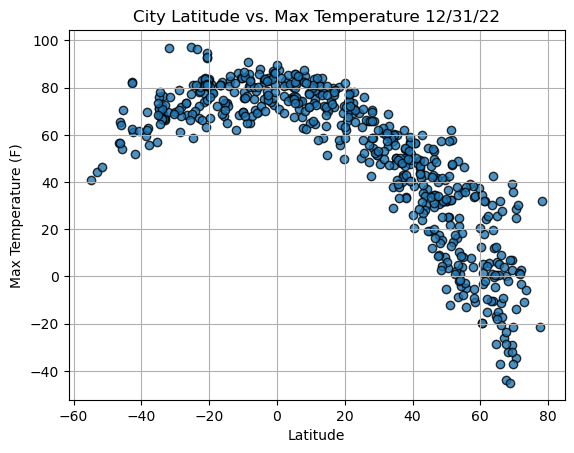

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

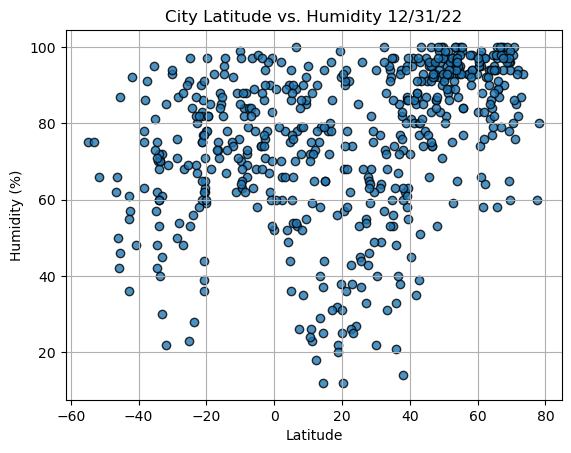

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

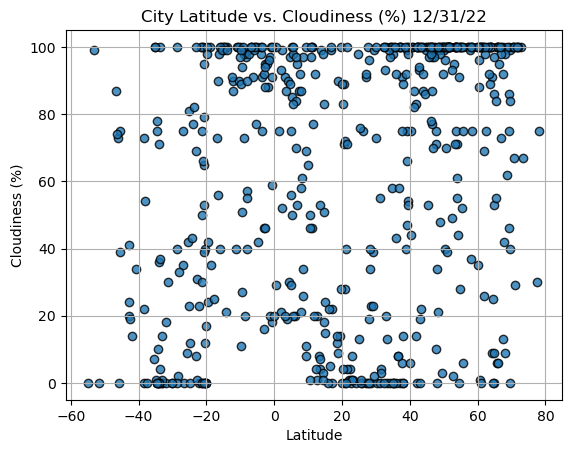

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

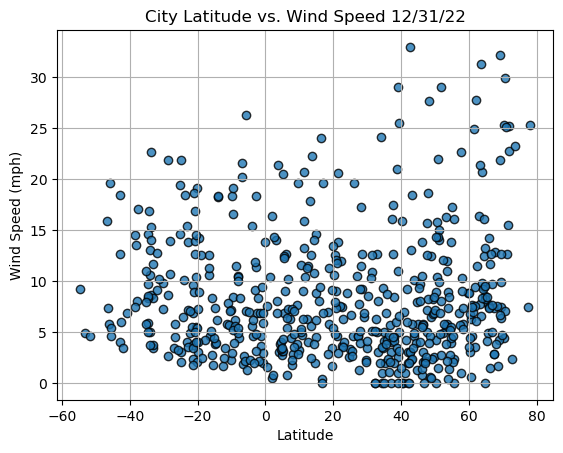

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()